# IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# INSPEKSI & DATA CLEANING

In [2]:
d1 = pd.read_csv('test.csv', na_values='n/a')
d1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
d2 = pd.read_csv('train.csv', na_values='n/a')
d2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Menggabungkan data pada train.csv, dan test.csv menjadi 1

In [4]:
df = d1.append(d2, ignore_index = True)

In [5]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


<AxesSubplot:>

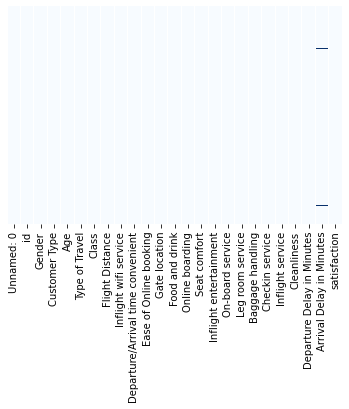

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap="Blues", yticklabels=False)

In [8]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [9]:
df['Arrival Delay in Minutes'].mean()

15.09112883918849

In [10]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [11]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<AxesSubplot:>

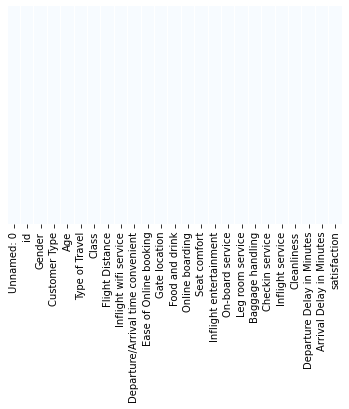

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap="Blues", yticklabels=False)

In [13]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [14]:
df.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)

In [15]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Mencari data duplikat.

In [16]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows")

duplicate

Duplicate Rows


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


# FEATURE ENGINEERING

In [17]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [18]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [19]:
df['Customer Type'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)

In [20]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [21]:
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

In [22]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [23]:
def Class(data):
    if data == 'Business':
        return 0
    elif data == 'Eco':
        return 1
    return 2

df['Class'] = df['Class'].apply(Class)

In [24]:
df['Total_Rating'] = df['Inflight wifi service'] + df['Departure/Arrival time convenient'] + df['Ease of Online booking'] + df['Gate location'] + df['Food and drink'] + df['Online boarding'] + df['Seat comfort'] + df['Inflight entertainment'] + df['On-board service'] + df['Leg room service'] + df['Baggage handling'] + df['Checkin service'] + df['Inflight service'] + df['Cleanliness']

In [25]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_Rating
0,0,1,52,1,1,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,satisfied,58
1,0,1,36,1,0,2863,1,1,3,1,...,4,4,4,3,4,5,0,0.0,satisfied,48
2,1,0,20,1,1,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,30
3,1,1,44,1,0,3377,0,0,0,2,...,1,1,1,3,1,4,0,6.0,satisfied,25
4,0,1,49,1,1,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,satisfied,37


In [26]:
def Ratings(data):
    if data > 25 and data <= 40:
        return 'Average'
    elif data > 40 and data <= 55:
        return 'Good'
    elif data > 55 and data <= 100:
        return 'Excellent'
    return 'Bad'

df['Group_Rating'] = df['Total_Rating'].apply(Ratings)

In [27]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_Rating,Group_Rating
0,0,1,52,1,1,160,5,4,3,4,...,5,5,2,5,5,50,44.0,satisfied,58,Excellent
1,0,1,36,1,0,2863,1,1,3,1,...,4,4,3,4,5,0,0.0,satisfied,48,Good
2,1,0,20,1,1,192,2,0,2,4,...,1,3,2,2,2,0,0.0,neutral or dissatisfied,30,Average
3,1,1,44,1,0,3377,0,0,0,2,...,1,1,3,1,4,0,6.0,satisfied,25,Bad
4,0,1,49,1,1,1182,2,3,4,3,...,2,2,4,2,4,0,20.0,satisfied,37,Average


# Data Modeling Preprocessing

In [28]:
data_cluster = df.drop(['satisfaction', 'Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness', 'Group_Rating'], axis = 1)

In [29]:
std_sclr = StandardScaler()

In [30]:
scaled_data = std_sclr.fit_transform(data_cluster)

In [31]:
df_scaled = pd.DataFrame(scaled_data,columns = data_cluster.columns)
df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Total_Rating
0,-0.985340,0.473422,0.831523,0.669366,0.653608,1.362484
1,-0.985340,0.473422,-0.226727,0.669366,-0.955724,0.283054
2,1.014878,-2.112281,-1.284977,0.669366,0.653608,-1.659918
3,1.014878,0.473422,0.302398,0.669366,-0.955724,-2.199633
4,-0.985340,0.473422,0.633101,0.669366,0.653608,-0.904318


# K-MEANS CLUSTERING

In [32]:
X = scaled_data

In [33]:
inertia = []

for k in range(1, 10):
    cluster_model = KMeans(n_clusters = k, random_state = 400)
    cluster_model.fit(X)
    inertia_value = cluster_model.inertia_
    inertia.append(inertia_value)

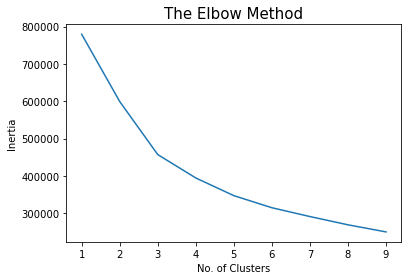

In [34]:
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

Nilai dari K = 3

In [43]:
inertia

[779279.9999999688,
 599103.4801406722,
 457045.2832636472,
 394459.7392093404,
 347120.53479881,
 314796.0097266985,
 291163.0591098142,
 269065.5362555383,
 250040.34910490786]

In [35]:
kmeans_algorithm = KMeans(n_clusters = 3, random_state = 400)
kmeans_algorithm.fit(X)

KMeans(n_clusters=3, random_state=400)

In [36]:
kmeans_algorithm.cluster_centers_

array([[ 0.01600922,  0.47126484, -0.07195022, -1.27027941,  0.8744628 ,
        -0.22565609],
       [-0.06584477, -2.11228136, -0.60516646,  0.65441682,  0.09024382,
        -0.28439083],
       [ 0.01379798,  0.47300333,  0.28407832,  0.66047334, -0.66236008,
         0.271207  ]])

In [37]:
df['Cluster'] = kmeans_algorithm.labels_ + 1

In [38]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_Rating,Group_Rating,Cluster
0,0,1,52,1,1,160,5,4,3,4,...,5,2,5,5,50,44.0,satisfied,58,Excellent,3
1,0,1,36,1,0,2863,1,1,3,1,...,4,3,4,5,0,0.0,satisfied,48,Good,3
2,1,0,20,1,1,192,2,0,2,4,...,3,2,2,2,0,0.0,neutral or dissatisfied,30,Average,2
3,1,1,44,1,0,3377,0,0,0,2,...,1,3,1,4,0,6.0,satisfied,25,Bad,3
4,0,1,49,1,1,1182,2,3,4,3,...,2,4,2,4,0,20.0,satisfied,37,Average,3


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

Text(0.5, 1.0, 'Clusters')

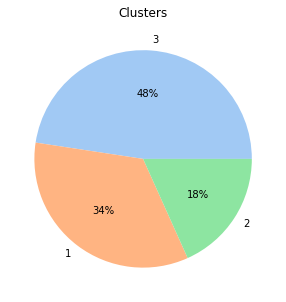

In [40]:
colors = sns.color_palette('pastel')[0:5]
Cluster = df['Cluster'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(Cluster, labels = Cluster.index, colors = colors, autopct='%.0f%%')
plt.title('Clusters')

In [41]:
df.to_csv('Hasil Cluster Penumpang Pesawat.csv')